In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 
import pickle 

In [2]:
df = pd.read_csv("../data/loan_approval_dataset.csv")

df.drop(['loan_id'], axis='columns', inplace=True)

df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [4]:
df.dtypes

no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [5]:
columns = ['dependentes', 'educacao', 'empregado', 'renda_anual', 
           'valor', 'pagamento', 'score', 'patrimonio_residencial', 'patrimonio_comercial', 
           'patrimonio_luxo', 'patrimonio_bancario', 'status']

df.columns = columns 

In [7]:
df['educacao'] = df['educacao'].apply(lambda value: 1 if value == ' Graduate' else 0)
df['empregado'] = df['empregado'].apply(lambda value: 1 if value == ' Yes' else 0)
df['status'] = df['status'].apply(lambda value: 1 if value == ' Approved' else 0)

<Axes: >

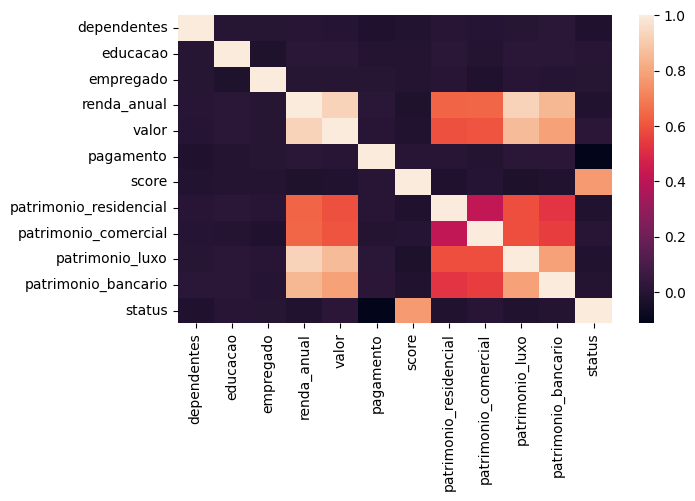

In [8]:
plt.figure(figsize=(7, 4))

sns.heatmap(df.corr())

In [9]:
print('Média do score de clientes que tiveram empréstimos aprovados:', df['score'][df['status'] == 1].mean())
print('Média do score de clientes que tiveram empréstimos reprovados:', df['score'][df['status'] == 0].mean())

Média do score de clientes que tiveram empréstimos aprovados: 703.4619728915662
Média do score de clientes que tiveram empréstimos reprovados: 429.4680719156851


In [13]:
X, y = df.drop('status', axis='columns'), df.status

In [16]:
scaler = StandardScaler()

scaler.fit(X)

with open("scaler.pkl", "wb") as f: 
    pickle.dump(scaler, f)

In [26]:
#split train and test 
training_set = int(len(df) * 0.8)

x_train, x_test = X[:training_set], X[training_set:]
y_train, y_test = y[:training_set], y[training_set:]

#scaler 
x_train, x_test = scaler.transform(x_train), scaler.transform(x_test)

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from scipy.spatial.distance import cosine
from sklearn.metrics import confusion_matrix

In [52]:
#verify best classifier 
models = [
    KNeighborsClassifier(), 
    GaussianNB(), 
    RandomForestClassifier(), 
    LogisticRegression(), 
    SVC(), 
]

results = dict()

for model in models: 
    name = model.__class__.__name__
    results[name] = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=10).mean()

results 

In [58]:
#create and save model 
model = RandomForestClassifier()

classifier = model.fit(x_train, y_train)

with open("classifier.pkl", "wb") as f: 
    pickle.dump(classifier, f)

In [59]:
#predict value 
y_pred = classifier.predict(x_test)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       299
           1       0.99      0.98      0.98       555

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [62]:
cnf = confusion_matrix(y_test, y_pred)

cnf 

array([[294,   5],
       [ 12, 543]], dtype=int64)

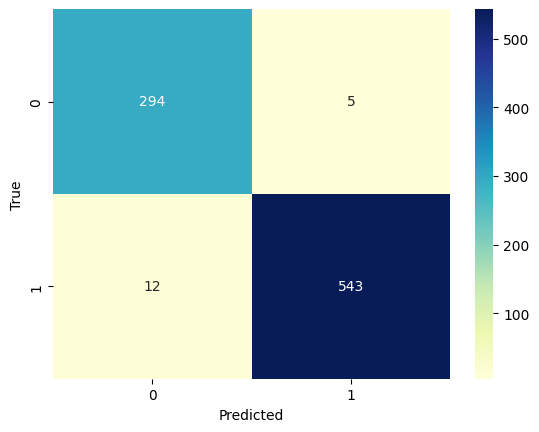

In [64]:
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu", fmt='g')

plt.ylabel("True")
plt.xlabel("Predicted")

plt.show()